In [ ]:
#Question 1

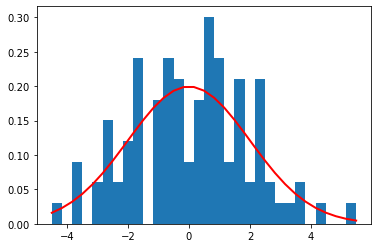

In [67]:
import numpy as np
mu1 = 0
sigma1 = 2
sample = np.random.normal(mu1,sigma1,100)

import matplotlib.pyplot as plot
count,bins, ignored = plot.hist(sample, 30, density=True)

import scipy.stats as stats

plot.plot(bins, stats.norm.pdf(bins,mu1,sigma1),linewidth=2,color='r')
plot.show()

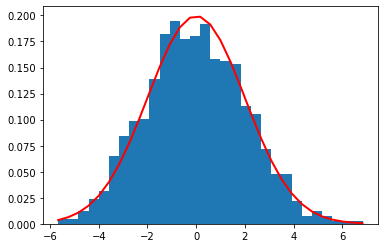

In [68]:
import numpy as np
mu1 = 0
sigma1 = 2
sample = np.random.normal(mu1,sigma1,1000)

import matplotlib.pyplot as plot
count,bins, ignored = plot.hist(sample, 30, density=True)

import scipy.stats as stats

plot.plot(bins, stats.norm.pdf(bins,mu1,sigma1),linewidth=2,color='r')
plot.show()

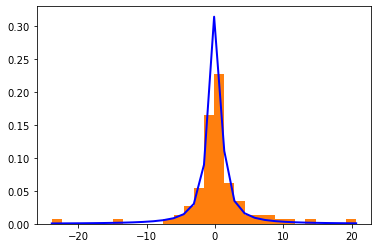

In [70]:
#Cauchy Distribution
samplec = np.random.standard_cauchy(100)
sample_cauchy = samplec[(samplec>-25) & (samplec<25)] 

count, bins, ignored = plot.hist(sample_cauchy, 30, density=True)

import matplotlib.pyplot as plot
count,bins, ignored = plot.hist(sample_cauchy, 30, density=True)

import scipy.stats as stats

plot.plot(bins, stats.cauchy.pdf(bins),linewidth=2,color='b')
plot.show()

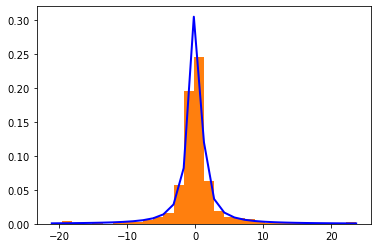

In [71]:
#Cauchy Distribution
samplec = np.random.standard_cauchy(1000)
sample_cauchy = samplec[(samplec>-25) & (samplec<25)] 

count, bins, ignored = plot.hist(sample_cauchy, 30, density=True)

import matplotlib.pyplot as plot
count,bins, ignored = plot.hist(sample_cauchy, 30, density=True)

import scipy.stats as stats

plot.plot(bins, stats.cauchy.pdf(bins),linewidth=2,color='b')
plot.show()

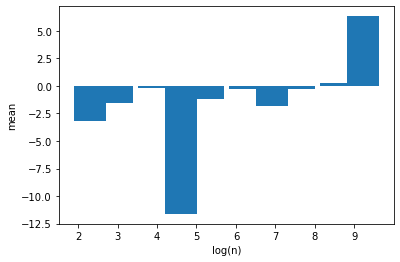

In [27]:
# Prove that mean of cauchy distribution does not converge

draws=[10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
cauchy = map(np.random.standard_cauchy,draws)
means = [i.mean() for i in cauchy]
log_n = np.log(draws)
plot.bar(log_n,means)
plot.ylabel('mean')
plot.xlabel('log(n)')
plot.show()

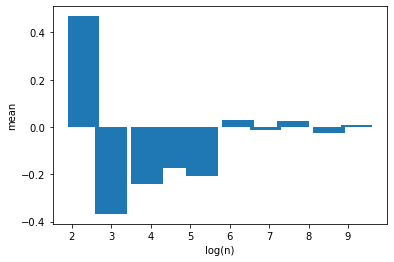

In [32]:
#Prove that mean of normal distribution converge

draws1=[10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
normal = map(np.random.standard_normal,draws1)
means1 = [i.mean() for i in normal]
log_n = np.log(draws1)
plot.bar(log_n,means1)
plot.ylabel('mean')
plot.xlabel('log(n)')
plot.show()

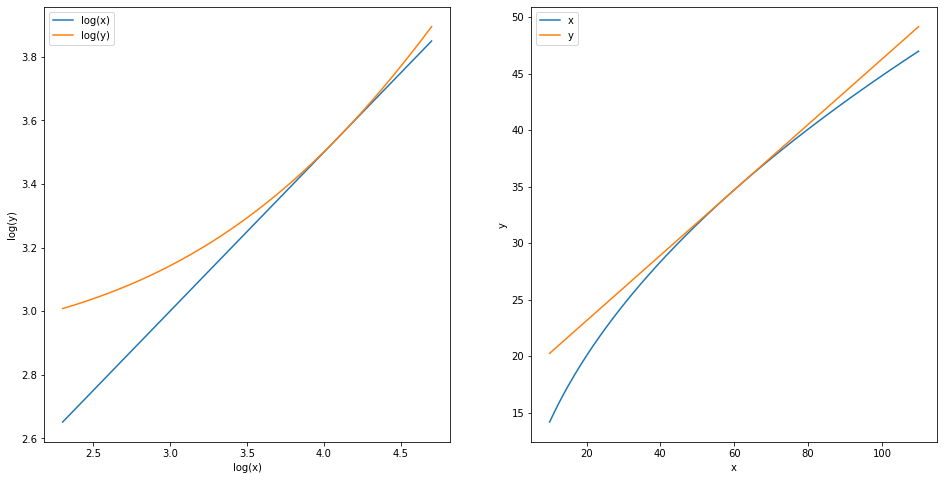

In [52]:
#Question 2
x = np.arange(10,110,0.1)
yh1 = 17.357+0.2893*x
yh2 = np.exp(1.5+0.5*np.log(x))
fig, ax = plot.subplots(1, 2, figsize=(16, 8), sharey=False)
line1=ax[0].plot(np.log(x),np.log(yh2))
line2=ax[0].plot(np.log(x),np.log(yh1))
ax[0].set_xlabel('log(x)')
ax[0].set_ylabel('log(y)')
ax[0].legend(['log(x)', 'log(y)'])

ax[1].plot(x,yh2)
ax[1].plot(x,yh1)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend(['x','y'])

plot.show()

In [72]:
#Question 3

import pandas_datareader as pdr
import datetime as dt
start = dt.datetime(1947,1,1)
end = dt.datetime(2019,10,1)
var_list = ['PCEC', 'PINCOME']
data = pdr.DataReader(var_list, 'fred', start, end)


In [56]:
data.head()

,PCEC,PINCOME
DATE,,
1947-01-01,156.161,189.713
1947-04-01,160.031,189.720
1947-07-01,163.543,197.768
1947-10-01,167.672,200.715
1948-01-01,170.372,206.493


In [104]:
import pandas as pd
index=pd.date_range(start, end)
data['log_consumption'] = np.log(data['PCEC'])
data['log_income']=np.log(data['PINCOME'])
data['lagconsumption'] = data['log_consumption'].shift(periods=1)

import statsmodels.formula.api as smf
model = smf.ols("log_consumption ~ log_income + lagconsumption", data).fit()
model_par=np.array(model.params.values) 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        log_consumption   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        01:24:50   Log-Likelihood:                 986.98
No. Observations:                 291   AIC:                            -1968.
Df Residuals:                     288   BIC:                            -1957.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0170      0.005     -3.

<AxesSubplot:xlabel='DATE'>

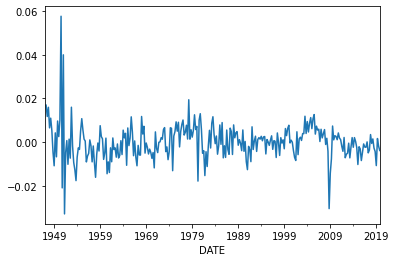

In [105]:
data["residuals"] = model.resid #adds column with estimated residuals to the dataframe

data["residuals"].plot()

In [106]:
signma = data['residuals'].std() 
data1=data
data1.insert(0, 'simulated residuals', np.random.normal(0, sigma, len(data.index))) #inserts column [0] with draws from N(0,sigma^2)

data1.head()

ValueError: cannot insert simulated residuals, already exists